In [1]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd /content/gdrive/My Drive/chung_proj/삼성카드

/content/gdrive/My Drive/chung_proj/삼성카드


In [5]:
card = pd.read_excel('데이터_삼성카드.xlsx')

In [6]:
# 컬럼명 변경
card.columns = ['기준년월','법정동코드','법정동명','업종코드','업종명','cnt','20m','30m','40m','50m','60m','20f','30f','40f','50f','60f','월','화','수','목','금','토','일','평일','휴일','a','b','c','d','e','f','g','h','i','j']

In [7]:
# 중복정보인 법정동 코드와 업종코드 열 삭제
card.drop(['법정동코드','업종코드'],axis=1)

# 불확실하고 활용도가 불명확한 결제시간 열 삭제
card = card.iloc[:,:-10]

# 군산/목포/통영 분리. 도&시 명칭 제거

In [8]:
gs = card[card.법정동명.str.contains('군산')]
mp = card[card.법정동명.str.contains('목포')]
ty = card[card.법정동명.str.contains('통영')]

In [9]:
gs.법정동명 = gs.법정동명.str.replace('전북 군산시 ','')
mp.법정동명 = mp.법정동명.str.replace('전남 목포시 ','')
ty.법정동명 = ty.법정동명.str.replace('경남 통영시 ','')
# 마지막 space한칸!!!

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#고군산군도의 소비 분포

In [10]:
고군산군도 = '대장도리 선유도리 무녀도리 신시도리 야미도리'.split(' ')
ggs = gs[gs.법정동명.isin(고군산군도)]

In [11]:
ggs2 = ggs.pivot_table(index='업종명',values='cnt',aggfunc='sum').rename_axis(index=None)\
.sort_values('cnt',ascending=False).rename(columns={'cnt':'고군산군도'})

In [12]:
ggs2

,고군산군도
음식점,2253
마트/할인점,1200
커피/음료,1166
편의점,870
취미,35


pie chart로 나타내보기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


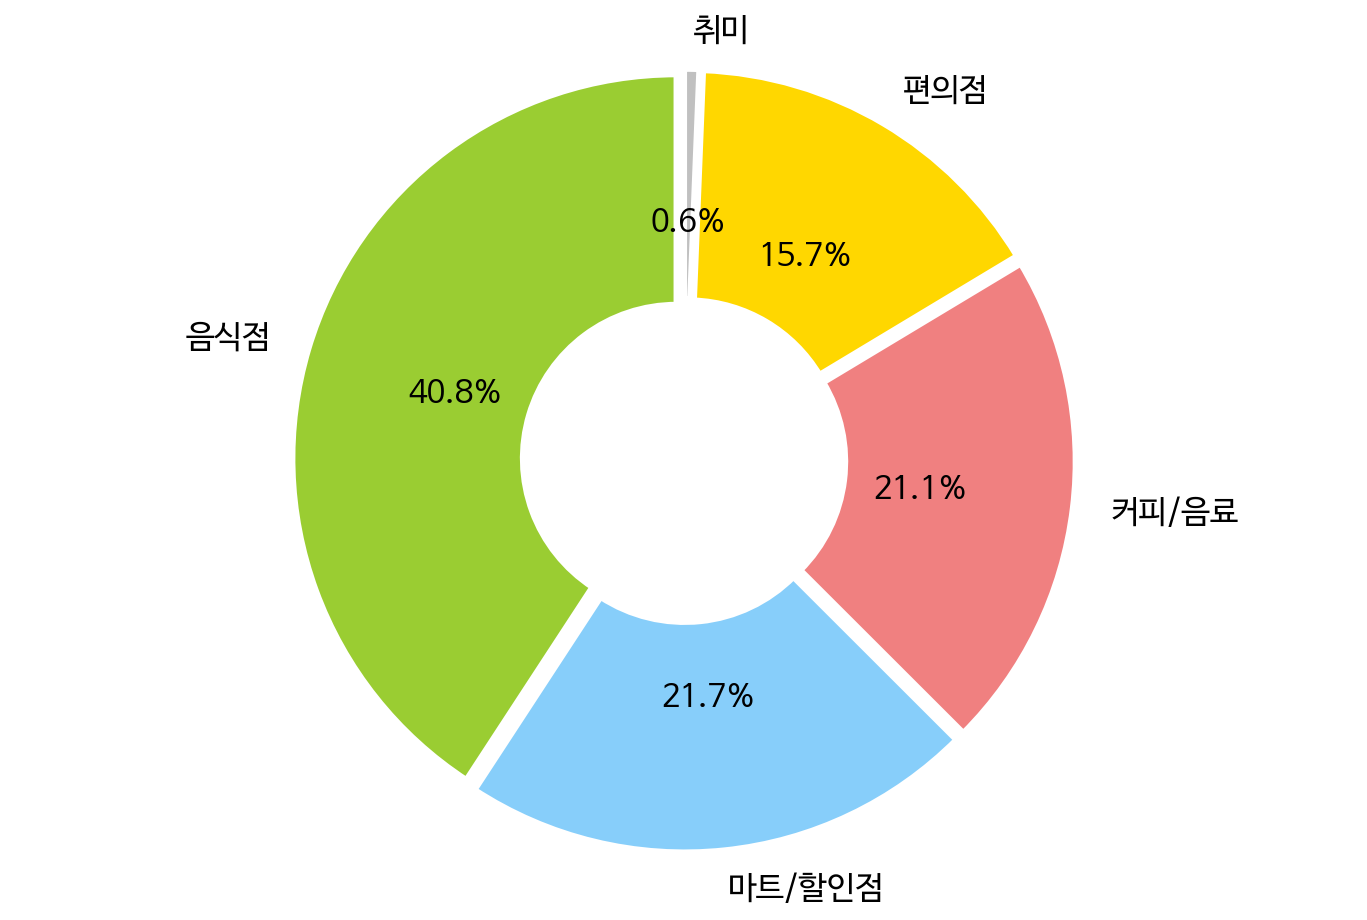

In [13]:
plt.rcParams['figure.figsize'] = [12, 8]

# information of groups
group_names = ggs2.index
group_sizes = ggs2.values
group_colors = ['yellowgreen', 'lightskyblue', 'lightcoral','gold','silver']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 3}
explode = [0.02, 0.02, 0.02, 0.02, 0.02]
# Pie chart

plt.pie(group_sizes, 
        labels=group_names, 
        colors=group_colors, 
        autopct='%.1f%%', # second decimal place
        startangle=90,
        textprops={'fontsize': 16},
        explode=explode,
        wedgeprops = wedgeprops) # text font size

plt.axis('equal')
plt.show()

In [14]:
ggs3 = ggs.pivot_table(index='업종명',values='휴일',aggfunc='sum').rename_axis(index=None)\
.sort_values('휴일',ascending=False).rename(columns={'휴일':'휴일'})

In [15]:
ggs4 = ggs.pivot_table(index='업종명',values='평일',aggfunc='sum').rename_axis(index=None)\
.sort_values('평일',ascending=False).rename(columns={'평일':'평일'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


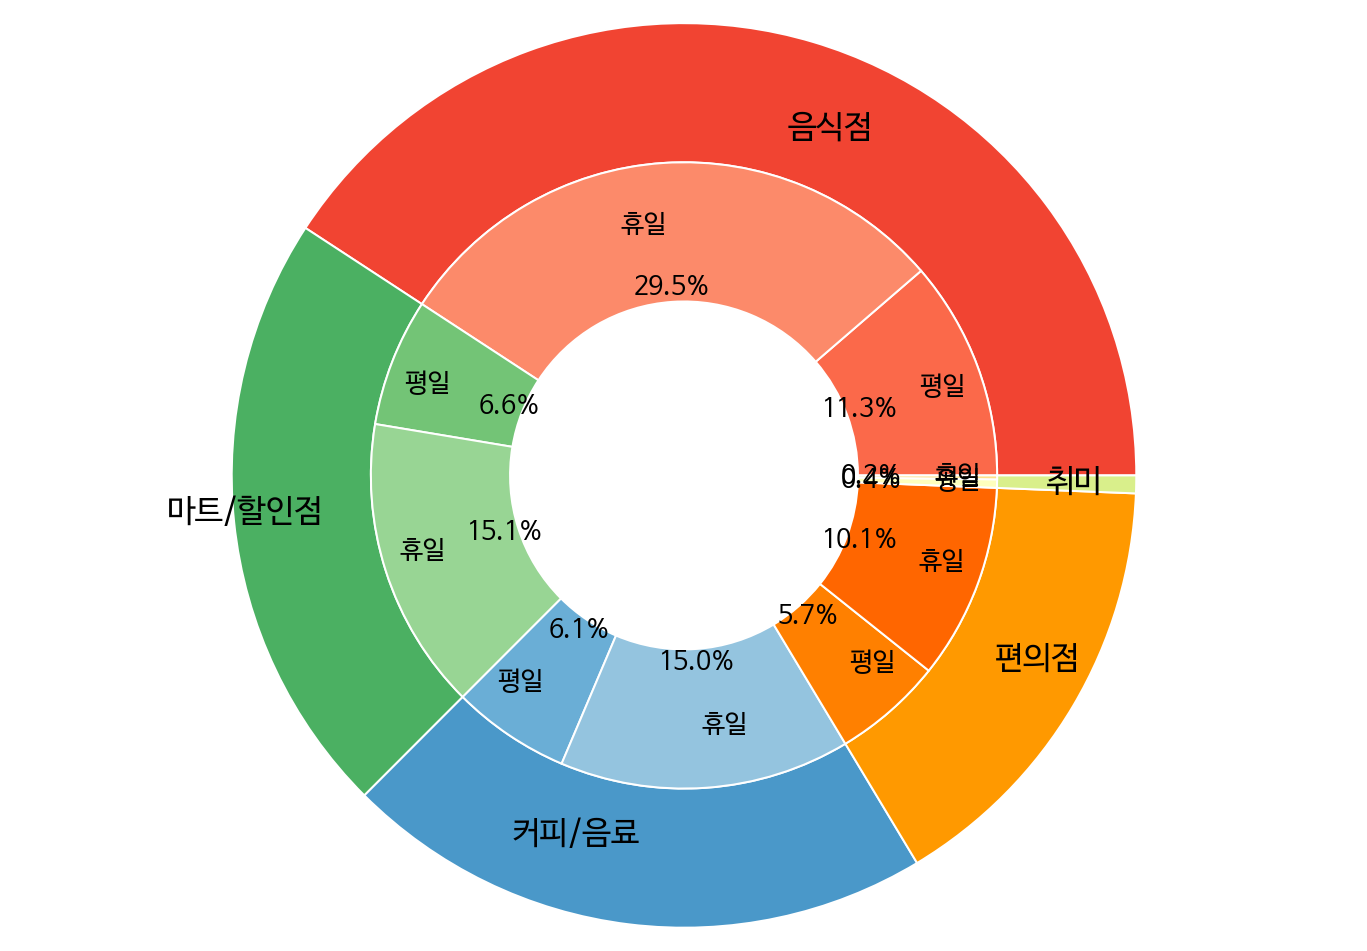

In [16]:
# importing library and set figure size

plt.rcParams['figure.figsize'] = [12, 8]
 # info. of groups

group_names = ggs2.index
group_sizes = ggs2.values

# info. of subgroups

subgroup_names = ['평일', '휴일' ,
                  '평일', '휴일', 
                  '평일', '휴일',
                  '평일', '휴일',
                  '평일', '휴일']
subgroup_sizes = [ggs4.values[0], ggs3.values[0], ggs4.values[1],836, ggs4.values[2], 829, ggs4.values[3],557, 24,ggs3.values[4]]

# colors

a, b, c ,d ,e= [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.autumn, plt.cm.RdYlGn]

# width
width_num = 0.4
# Outside Ring
fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, 
                        radius=1.3, 
                        labels=group_names, 
                        labeldistance=0.8,
                        colors=[a(0.6), b(0.6), c(0.6),d(0.6), e(0.6)]
                        ,textprops={'fontsize': 16})
plt.setp(pie_outside, 
         width=width_num, 
         edgecolor='white')

# Inside Ring

pie_inside, plt_labels, junk = \
    ax.pie(subgroup_sizes, 
           radius=(1.3 - width_num), 
           labels=subgroup_names, 
           labeldistance=0.8, 
           autopct='%1.1f%%', 
           colors=[a(0.5), a(0.4), 
                   b(0.5), b(0.4), 
                   c(0.5), c(0.4),
                   d(0.5), d(0.4),
                   e(0.5), e(0.4)
                   ], textprops={'fontsize': 13})

plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='white')
plt.show()